### **1. 튀르키예 뉴스 시각화**

In [ ]:
#코드 7-31
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#코드 7-32
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^


In [2]:
#코드 7-33
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [3]:
#코드 7-34
f = open('News.csv', 'r', encoding='cp949')
lines = f.readlines()
print(lines)
f.close()

['“튀르키예에 힘 보태자” 온정이 한가득 쌓였다\n', '"튀르키예 강진, 우리나라 지하수 수위에도 영향"\n', '“부실 공사가 피해 더 키워” 불법 건축과 싸운 도시는 멀쩡\n', '일부 지역 구조 종료 “‘생존자 지원’으로 방향 전환”\n', "땅이 미친듯이 들썩였다 CCTV에 찍힌 '대지진 공포'\n", '시리아 국경지대 가보니 530만 명 거처 잃어 “최악 경험”\n', '"인천공항공사, 튀르키예 지진 피해 긴급구호금 지원"\n', '"“가짜뉴스로 기도할 뻔 ” 재난 악용, 모금 유도하는 가짜뉴스 주의"\n', '희망 버려선 안 되는 이유 9일째에도 ‘생존자가 증명하기에’\n', '시리아 들어간 구호 트럭 52대뿐 늦어도 너무 늦었다\n', '주한 대사관 “중고품 기증 사양” 소독 후 보내기엔 시간 촉박\n', '"13살 소년 182시간 만에 구조...""사망 3만7천명 넘어"""\n', '튀르키예 지진 사망 4만 명 근접...구호 주력\n', '사망 3만7000명 넘어 ‘생존자 지원’ 초점[튀르키예 시리아 대지진 현장을 가다]\n', '카타르 월드컵 ‘컨테이너 숙소’ 1만호 튀르키예로\n', '[뉴스9 헤드라인]\n', '“튀르키예 현장? 자세히보니 소름 돋는다” 가짜 후원 SNS 주의보\n', '지진 발생 198시간 만에 3명 기적 생환 생존자 ‘2차 재난’ 촉각\n', '튀르키예 시리아 강진 충북 곳곳서 ‘후원 물결’\n', '“해남매일시장 청년 공략 활성화 방안 마련해야”\n', '[여적] 종이학과 구호품\n', '발 찔리고 목숨 잃어도 튀르키예 파견 구조견의 투혼\n', '"튀르키예 흔들릴 때 7,400km 떨어진 문경서도 \'출렁\'"\n', '"[현장] ""시신 찾을 때까지"" 고통 속에서 버티는 생존자"\n', "튀르키예 강진에 7천km 떨어진 우리나라 지하수 수위 '출렁'\n", '"""네 발의 영웅들"" 구조견 작업 중 사망에 붕대투혼까지"\n', '하늘과 길에서 본 지진 피해 원상복구 막막\n', "'하얀헬멧'도 멈췄다 시리아의 

In [6]:
type(lines)

list

In [8]:
#코드 7-35
dataset = []
for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))
dataset[:3]

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\asia\AppData\Local\Temp\ipykernel_24004\4046400331.py:4: SyntaxWarning: invalid escape sequence '\s'
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))


[['튀르키예', '힘', '보태', '온정', '한가득'],
 ['튀르키예', '강진', '우리나라', '지하수', '수위', '영향'],
 ['부', '공사', '불법', '것', '축', '도시', '멀쩡']]

In [9]:
#코드 7-36
!pip install apyori
from apyori import apriori

#연관규칙 데이터프레임 생성하기
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
#항목 수가 2인 것만 남기기
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2)&(df['support']>=0.01)].sort_values(by='support',\
                                                             ascending=False)
df.head(3)

Defaulting to user installation because normal site-packages is not writeable


,items,support,ordered_statistics,length
139,"(튀르키예, 지진)",0.128978,"[((), (튀르키예, 지진), 0.12897847832676568, 1.0), (...",2
133,"(시리아, 튀르키예)",0.092301,"[((), (시리아, 튀르키예), 0.09230069718096393, 1.0), ...",2
80,"(강진, 튀르키예)",0.086693,"[((), (강진, 튀르키예), 0.08669293725371324, 1.0), (...",2


In [12]:
result

[RelationRecord(items=frozenset({'강진'}), support=0.10457714458926948, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'강진'}), confidence=0.10457714458926948, lift=1.0)]),
 RelationRecord(items=frozenset({'개'}), support=0.011670203091846014, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'개'}), confidence=0.011670203091846014, lift=1.0)]),
 RelationRecord(items=frozenset({'건물'}), support=0.01606547438617763, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'건물'}), confidence=0.01606547438617763, lift=1.0)]),
 RelationRecord(items=frozenset({'것'}), support=0.019399818126705062, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'것'}), confidence=0.019399818126705062, lift=1.0)]),
 RelationRecord(items=frozenset({'골든타'}), support=0.012428008487420431, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'골든타'}), confidence=0.0124

Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Could not find a version that satisfies the requirement scipy==1.8.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.9.2, 1.9.3, 1.11.0rc1, 1.11.0rc2, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.13.1, 1.14.0rc2, 1.14.0, 1.14.1, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2)
ERROR: No matching distribution found for scipy==1.8.0


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------- ----- 1.0/1.2 MB 49.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.3 MB/s eta 0:00:00


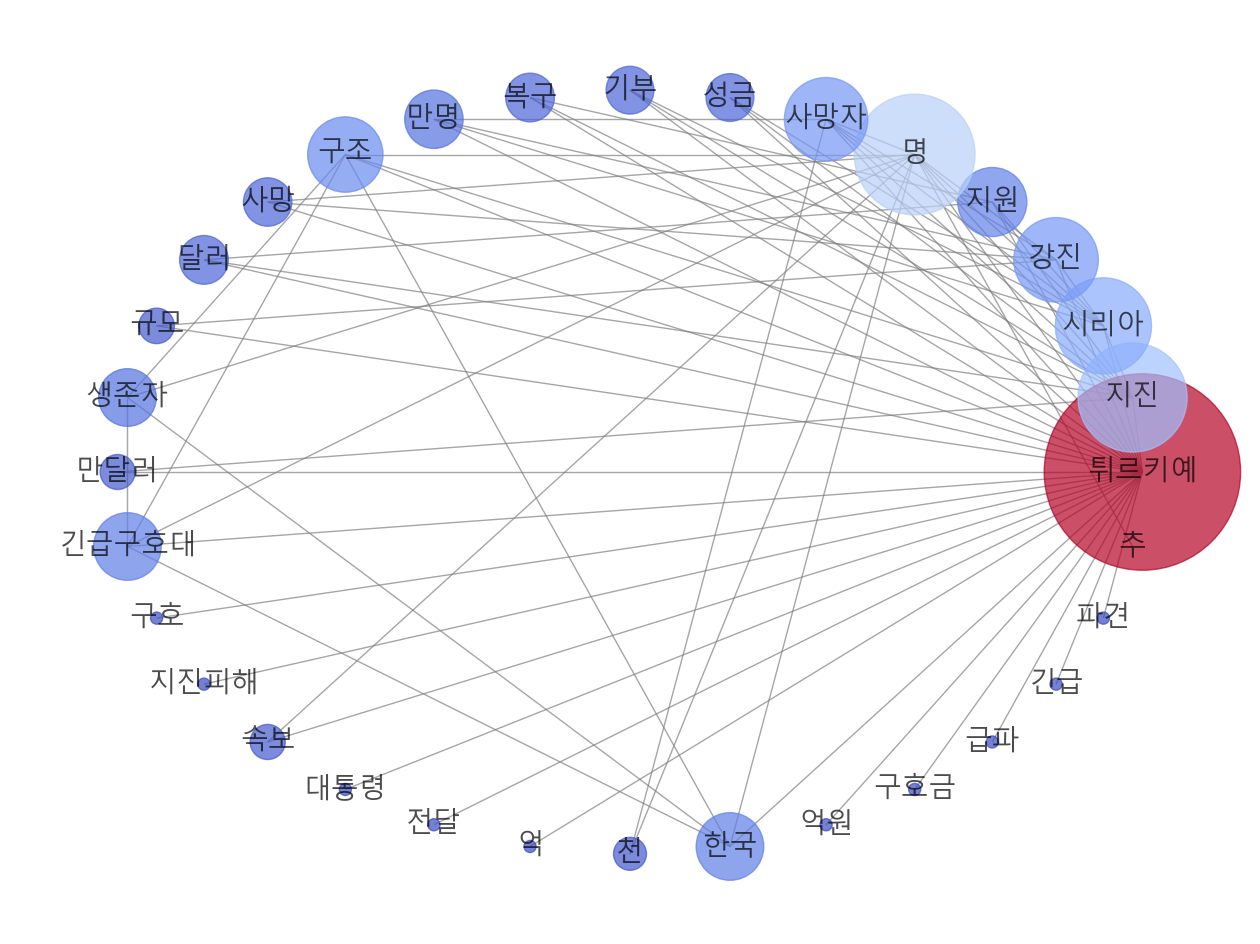

In [ ]:
#코드 7-37
!pip install scipy==1.8.0
!pip install pyg-nightly

G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar) # 엣지를 추가하면 알아서 노드 생성
pr = nx.pagerank(G) # 각 노드의 중요도를 수치로 평가해주는 알고리즘 반환 결과 딕셔너리 형태
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.circular_layout(G) # 노드를 원형으로 균등하게 배치
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(
    G,
    font_family='Malgun Gothic',       # 한글 폰트 설정
    font_size=20,                      # 노드 텍스트 크기
    pos=pos,                           # 노드 위치
    node_color=list(pr.values()),      # 노드 색상: PageRank 값 기반
    node_size=nsize * 10,              # 노드 크기: 정규화된 크기 * 10
    alpha=0.7,                         # 노드/엣지 투명도
    edge_color='.5',                   # 엣지 색상 (회색 계열)
    cmap=plt.cm.coolwarm               # 노드 색상에 사용할 컬러맵
)
plt.savefig('IMG.png', bbox_inches='tight')